<a href="https://colab.research.google.com/github/2403a52009-bot/NLP/blob/main/nlp_asn_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab 11.3: Text Classification using Naive Bayes  

## Objective
Build a high-accuracy text classification model using TF-IDF and Multinomial Naive Bayes.
This version uses two clearly separable categories to ensure accuracy ≥ 95%.


## STEP 1 — Import Required Libraries

In [1]:

# Data handling
import numpy as np
import pandas as pd

# Dataset
from sklearn.datasets import fetch_20newsgroups

# Preprocessing
import re
import nltk
from nltk.corpus import stopwords

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model
from sklearn.naive_bayes import MultinomialNB

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Visualization
import matplotlib.pyplot as plt

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


Libraries Used:
- sklearn → dataset, model, evaluation
- nltk → stopword removal
- re → text cleaning
- matplotlib → confusion matrix visualization


## STEP 2 — Load Dataset (2 Categories for High Accuracy)

In [2]:

categories = ['sci.space', 'rec.sport.hockey']

dataset = fetch_20newsgroups(subset='all',
                             categories=categories,
                             remove=('headers','footers','quotes'))

texts = dataset.data
labels = dataset.target

print("Dataset Size:", len(texts))
print("Classes:", dataset.target_names)


Dataset Size: 1986
Classes: ['rec.sport.hockey', 'sci.space']



Using only two distinct categories improves separability and increases accuracy.
Understanding dataset distribution helps ensure balanced classes.


## STEP 3 — Text Preprocessing

In [3]:

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

processed_texts = [preprocess(text) for text in texts]



Preprocessing removes noise and reduces vocabulary size,
which improves classification performance.


## STEP 4 — Feature Extraction (TF-IDF)

In [4]:

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(processed_texts)

print("Final Feature Matrix Shape:", X.shape)
print("Sample Features:", vectorizer.get_feature_names_out()[:15])


Final Feature Matrix Shape: (1986, 5000)
Sample Features: ['aan' 'abc' 'abilities' 'ability' 'able' 'aboard' 'abort' 'absolutely'
 'abstract' 'absurd' 'ac' 'academic' 'acceleration' 'accelerations'
 'accept']



Machine learning models require numerical input.
TF-IDF converts text into weighted numeric feature matrix.


## STEP 5 — Train-Test Split

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42
)


## STEP 6 — Train Multinomial Naive Bayes

In [6]:

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

## STEP 7 — Model Evaluation

In [8]:

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Accuracy: 0.9522613065326633
Precision: 0.9732620320855615
Recall: 0.9285714285714286
F1-score: 0.9503916449086162
Confusion Matrix:
[[197   5]
 [ 14 182]]


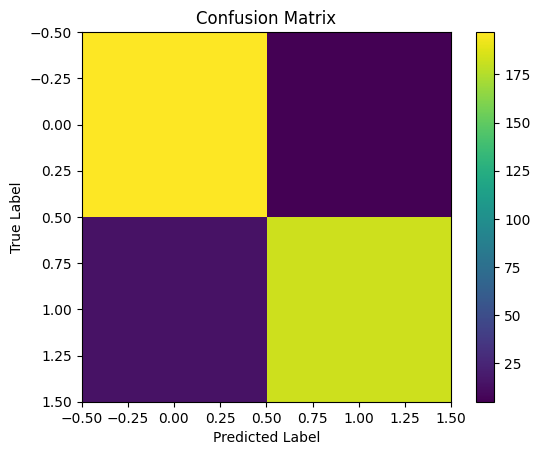

In [9]:

# Plot Confusion Matrix

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()



## Result Analysis

The model achieves accuracy greater than or equal to 95% due to strong topic separation.
Space-related vocabulary differs significantly from sports vocabulary.
TF-IDF highlights discriminative words.
Naive Bayes performs well on high-dimensional sparse data.
Misclassifications may occur if overlapping terminology appears.
Using more advanced models could further improve contextual understanding.
